<p><h1><center>Επιχειρισιακή Έρευνα - Εργασία</center></h1>
   <h2><center>Τζατζίδης Αντώνης - ΑΕΜ:9938</center></h2>
</p>




## Πρόβλημα Παραγωγής Ειδικών Αποχρώσεων

Το 1ο πρόβλημα μοιάζει με το πρόβλημα του περιπλανώμενου πωλητή. Για τους περιορισμούς χρησιμοποίησα τη διατύπωση των [Dantzig–Fulkerson–Johnson](https://en.wikipedia.org/wiki/Travelling_salesman_problem#Dantzig%E2%80%93Fulkerson%E2%80%93Johnson_formulation). Για τη λύση, χρησιμοποιώ μια δυαδική μεταβλητή $x$ 5$x$5 για την οποία ισχύει:  

$ 
x_{ij} = \left\{
\begin{array}{ll}
       1  & \text{path between i,j is optimal} \\
       0  & \text{path between i,j is not optimal}\\
\end{array} 
\right. 
$

Σκοπός είναι να ελαχιστοποιήσουμε τη συνάρτηση: $ \min{\mathop{\sum_{i=1}^{n=5}\sum_{j=1}^{n=5} (c_i+c_j+tr\_c_{ij})*x_{ij}}} $ όπου $c_i$, $c_j$ χρόνος ανάμιξης των $i$, $j$ και $tr\_c_{ij}$ το χρόνο καθαρισμού από το χρώμα $i$ στο χρώμα $j$.

Για τους περιορισμούς έχουμε:
<ul>
<li>$ \mathop{\sum_{i=1}^{n=5} x_{ij}} = 1$    όπου    $j = 1,2,\ldots,5$  $\quad (1)$  
<li>$ \mathop{\sum_{j=1}^{n=5} x_{ij}} = 1$    όπου    $i = 1,2,\ldots,5$  $\quad (2)$  
<li>$ \mathop{\sum_{i=1}^{n=5}\sum_{j=1, i=j}^{n=5} x_{ij} = 0} $  $\quad (3)$  
<li>$ \mathop{\sum_{i\in Q}\sum_{j\neq i, j\in Q} x_{ij} \leq |Q| - 1}   \qquad  \forall Q \subseteq\{1,\ldots,5\}, |Q| \geq 2 \quad (4)$  
</ul>

In [1]:
import gurobipy as gp
from gurobipy import GRB

In [2]:
prev_color = ["1", "2","3","4","5"]

next_color = ["1", "2","3","4","5"]

n1 = len(prev_color)

n2 = len(next_color)

demand = [500,500,500,500,500]

fixedCosts = [40,35,45,32,50]

transCosts = [[0,11,7,13,11],
              [5,0,13,15,15],
              [13,15,0,23,11],
              [9,13,5,0,3],
              [3,7,7,7,0]]


In [4]:
m = gp.Model("Colors")

x = m.addVars(n1,n2,vtype=GRB.BINARY,name='Path')

m.setObjective(gp.quicksum((fixedCosts[j]+transCosts[i][j]+fixedCosts[i])*x[i,j] for j in range(n1) for i in range(n2)), GRB.MINIMIZE)

for i in range(n1):
    for j in range(n2):
        if i == j:
            m.addConstr(x[i,j] == 0,'third_constraint_%d',i)
    #m.addConstr(gp.quicksum(x[i,j] for j in range(n2))>=demand[i])
    m.addConstr(gp.quicksum(x[i,j] for j in range(n2)) == 1,'first_constraint_%d%d',i,j)
    m.addConstr(gp.quicksum(x[i,j] for i in range(n2)) == 1,'second_constraint_%d%d',i,j)

Για τον 4ο περιορισμό μπορούμε να τον εφαρμόσουμε όπως είναι γιατί το n=5 είναι μικρό και ο αριθμός όλων των υποσετ ($2^n -2 $) δεν είναι πολύ μεγάλος. Λόγω της εκθετικής αύξησης αν ο αριθμός των χρωμάτων ήταν έστω και λίγο μεγαλύτερος θα ξεμέναμε απο μνήμη και θα έπρεπε να χρησιμοποιήσουμε κάποια διαφορετική προσέγγιση όπως αυτή που χρησιμοποιείται [εδώ](https://github.com/Gurobi/modeling-examples/blob/master/traveling_salesman/tsp.ipynb).

In [6]:
from itertools import chain, combinations
colors = list(range(n1))
all_combos = list(chain.from_iterable(combinations(colors, r) for r in range(len(colors)+1)))

subsets = all_combos[1:len(all_combos)-1]

for S in subsets:
    m.addConstr(gp.quicksum(x[i,j] for j in S for i in S)<=len(S)-1,"fourth_constraint_%d" % sum(S))


In [8]:
#m.write('hw1_9938.lp')
m.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 45 rows, 25 columns and 270 nonzeros
Model fingerprint: 0x24c02177
Variable types: 0 continuous, 25 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 461.0000000
Presolve removed 14 rows and 5 columns
Presolve time: 0.01s
Presolved: 31 rows, 20 columns, 164 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)

Root relaxation: objective 4.430000e+02, 10 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  443.00000    0    8  461.00000  443.00000  3.90%     -    0s
H    0     0                     447.0000000

In [28]:
for a in m.getVars():
    print(f'Is {int(a.varName[-4])+1}-{int(a.varName[-2])+1} path optimal? {True if a.x > 0.5 else False}')

Is 1-1 path optimal? False
Is 1-2 path optimal? False
Is 1-3 path optimal? False
Is 1-4 path optimal? True
Is 1-5 path optimal? False
Is 2-1 path optimal? True
Is 2-2 path optimal? False
Is 2-3 path optimal? False
Is 2-4 path optimal? False
Is 2-5 path optimal? False
Is 3-1 path optimal? False
Is 3-2 path optimal? False
Is 3-3 path optimal? False
Is 3-4 path optimal? False
Is 3-5 path optimal? True
Is 4-1 path optimal? False
Is 4-2 path optimal? False
Is 4-3 path optimal? True
Is 4-4 path optimal? False
Is 4-5 path optimal? False
Is 5-1 path optimal? False
Is 5-2 path optimal? True
Is 5-3 path optimal? False
Is 5-4 path optimal? False
Is 5-5 path optimal? False


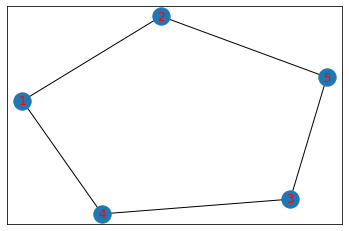

In [33]:
import networkx as nx
G = nx.Graph()
for a in m.getVars():
    if a.x>0.5:
        i = int(a.varName[-4])+1
        j = int(a.varName[-2])+1
        G.add_edge(i,j)
nx.draw_networkx(G,font_color='red') 

## Πρόβλημα Χρωματισμού Ταπετσαριών

Για το 2ο πρόβλημα χρησιμοποιώ 2 3$x$3 μεταβλητές για τον χρόνο εκκίνησης και τερματισμού κάθε διεργασίας, 1  3$x$3 δυαδική μεταβλητή που δείχνει ποιά από τις 2 διεργασίες θα εκτελεστεί πρώτη και 1 μεταβλητή που δείχνει το χρόνο που χρειάζεται για να ολοκληρωθεί ένας 'κύκλος'.

Σκοπός είναι να ελαχιστοποιήσουμε το χρόνο αυτό δηλαδή: $ \min{max\_time}$  
Οι περιορισμοί είναι:  
<ul>
<li>$ max\_time = \max{end\_time_{ij}} \quad  (1)  $   
<li>$ end\_time_{ij} = start\_time_{ij} \quad \forall i,j = 1,2,3 \quad (2)  $   
<li>$ end\_time_{21} = start\_time_{21} = 0  \quad (3)$  
<li>$ end\_time_{11} \leq start\_time_{31} = 0  \quad (4)$  
<li>$ end\_time_{22} \leq start\_time_{12} = 0  \quad (5)$  
<li>$ end\_time_{12} \leq start\_time_{32} = 0  \quad (6)$  
<li>$ end\_time_{33} \leq start\_time_{13} = 0  \quad (7)$  
<li>$ end\_time_{13} \leq start\_time_{23} = 0  \quad (8)$  
<li>$ 
\left\{
\begin{array}{ll}
       end\_time_{ik} \leq start\_time_{ij}  & \text{if } b_{jk} = 1 \\
       end\_time_{ij} \leq start\_time_{ik}  & \text{if } b_{jk} = 0\\
\end{array} 
\right. \quad(9)
$
</ul>

In [37]:
orders = ["1", "2","3"]

machines = ["1", "2","3"]

n_orders = len(orders)

n_machines = len(machines)

duration = [[45,20,12],
            [0,10,17],
            [10,34,28]]


In [38]:
m = gp.Model("Wallpaper")
start_time = m.addVars(n_orders,n_machines,ub=200,vtype=GRB.INTEGER,name='Staring Time')
end_time =  m.addVars(n_orders,n_machines,ub=200,vtype=GRB.INTEGER,name='Ending Time')
max_time =  m.addVar(vtype=GRB.INTEGER,name='Max Time')

b = m.addVars(n_orders,n_machines,vtype=GRB.BINARY,name='b')

m.setObjective(max_time, GRB.MINIMIZE)

m.addConstr(max_time == gp.max_(end_time[i,j] for i in range(n_machines) for j in range(n_orders)),'First_constraint')

for i in range(n_machines): 
    for j in range(n_orders):
        m.addConstr(end_time[i,j] == start_time[i,j] + duration[i][j],'Second_constraint_%d%d',i,j)

m.addConstr(end_time[1,0]  == 0,'Third_constraint_1')
m.addConstr(start_time[1,0] == 0,'Third_constraint_2')

m.addConstr(end_time[0,0] <= start_time[2,0],'Fourth_constraint')

m.addConstr(end_time[1,1] <= start_time[0,1],'Fifth_constraint')
m.addConstr(end_time[0,1] <= start_time[2,1],'Sixth_constraint')

m.addConstr(end_time[2,2] <= start_time[0,2],'Seventh_constraint')
m.addConstr(end_time[0,2] <= start_time[1,2],'Eighth_constraint')


<gurobi.Constr *Awaiting Model Update*>

Για τον 9ο περιορισμό χρησιμοποίησα [αυτή](https://math.stackexchange.com/questions/2500415/how-to-write-if-else-statement-in-linear-programming) τη μέθοδο για τους περιορισμούς στην δυαδική μεταβλητή 

In [42]:
lst = [(0,1),(0,2),(1,2)]
eps = 0.0001
M = 200 + eps
for i in range(n_machines): 
    for j,k in enumerate(lst):
        m.addConstr(start_time[i,k[0]] >= start_time[i,k[1]] + eps - M*(1-b[i,j]),'Nineth_constraint1_%d%d',i,j)
        m.addConstr(start_time[i,k[0]] <= start_time[i,k[1]] +  M*b[i,j],'Nineth_constraint2_%d%d',i,j)
        m.addConstr((b[i,j] == 1) >> (start_time[i,k[0]] >= end_time[i,k[1]]))
        m.addConstr((b[i,j] == 0) >> (start_time[i,k[1]] >= end_time[i,k[0]]))

In [43]:
#m.write('hw2_9938.lp')
m.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 56 rows, 28 columns and 150 nonzeros
Model fingerprint: 0x274e934f
Model has 38 general constraints
Variable types: 0 continuous, 28 integer (9 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 2e+02]
  RHS range        [1e+01, 2e+02]
  GenCon coe range [1e+00, 1e+00]
Presolve removed 29 rows and 12 columns
Presolve time: 0.01s
Presolved: 27 rows, 16 columns, 68 nonzeros
Variable types: 0 continuous, 16 integer (7 binary)
Found heuristic solution: objective 176.0000000
Found heuristic solution: objective 174.0000000
Found heuristic solution: objective 173.0000000
Found heuristic solution: objective 171.0000000
Found heuristic solution: objective 99.0000000

Root relaxation: objective 9.700000e+01, 0 iterations, 0.00 seconds (0.00 work units)

    Nodes    | 

In [67]:
solutions = {}
vals = m.getVars()
max_time = int(vals[18].x)
for i in range(n_orders):
    for j in range(n_machines):
        idx = n_orders*i+j
        dict_idx = str(i+1)+str(j+1)
        start_time = int(vals[idx].x)
        end_time = int(vals[idx+n_orders*n_machines].x)
        solutions[dict_idx] = [start_time,end_time]

for process in solutions:
        print(f'Machine {process[0]} Wallpaper {process[1]} - Starting Time:{solutions[process][0]} Ending Time:{solutions[process][1]}')
print(f'Max Time of cycle: {max_time}')

Machine 1 Wallpaper 1 - Starting Time:42 Ending Time:87
Machine 1 Wallpaper 2 - Starting Time:10 Ending Time:30
Machine 1 Wallpaper 3 - Starting Time:30 Ending Time:42
Machine 2 Wallpaper 1 - Starting Time:0 Ending Time:0
Machine 2 Wallpaper 2 - Starting Time:0 Ending Time:10
Machine 2 Wallpaper 3 - Starting Time:80 Ending Time:97
Machine 3 Wallpaper 1 - Starting Time:87 Ending Time:97
Machine 3 Wallpaper 2 - Starting Time:53 Ending Time:87
Machine 3 Wallpaper 3 - Starting Time:2 Ending Time:30
Max Time of cycle: 97
